# <a id='toc1_'></a>[Data Analysis for Artemis Apollo mission](#toc0_)

\
\
![Artemis program logo](img/Artemis_program_logo.jpg)

**Project description:**

Prediction of weight, type of future sampling, etc. from existing data of Apollo space program.

**Resources:**
- Project source: [Plan moon mission using Python](https://learn.microsoft.com/en-us/training/modules/plan-moon-mission-using-python-pandas/) _(with more details)_.
- Apollo history in [Wikipedia](https://fa.wikipedia.org/wiki/%D8%A8%D8%B1%D9%86%D8%A7%D9%85%D9%87_%D9%81%D8%B6%D8%A7%DB%8C%DB%8C_%D8%A2%D9%BE%D9%88%D9%84%D9%88).
- The raw data is scraped from [here](https://curator.jsc.nasa.gov/lunar/samplecatalog/sample_results_list.cfm) into CSV file in data folder.


**Table of contents:**<a id='toc0_'></a>    
- [Data Analysis for Artemis Apollo mission](#toc1_)    
  - [01: Convert data to DataFrame](#toc1_1_)    
  - [02: Data Cleaning](#toc1_2_)    
      - [View and describe data:](#toc1_2_1_1_)    
      - [Visualization:](#toc1_2_1_2_)    
      - [Dealing with Missing value and Duplicate rows](#toc1_2_1_3_)    
    - [Outlier Detection](#toc1_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---

## <a id='toc1_1_'></a>[01: Convert data to DataFrame](#toc0_)

Importing modules:

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Add options:

In [258]:
plt.style.use('seaborn')
%matplotlib inline

C:\Users\ArminaRayaneh\AppData\Local\Temp\ipykernel_3324\1770176069.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Importing Data:

In [259]:
samples_df = pd.read_csv('Data/rocksamples.csv')

## <a id='toc1_2_'></a>[02: Data Cleaning](#toc0_)

#### <a id='toc1_2_1_1_'></a>[View and describe data:](#toc0_)

In [260]:
samples_df  #Show head, tail and shape of data

,ID,Mission,Type,Subtype,Weight (g),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,125.80,88.36
1,10002,Apollo11,Soil,Unsieved,5629.00,93.73
2,10003,Apollo11,Basalt,Ilmenite,213.00,65.56
3,10004,Apollo11,Core,Unsieved,44.80,71.76
4,10005,Apollo11,Core,Unsieved,53.40,40.31
...,...,...,...,...,...,...
2224,79528,Apollo17,Breccia,Regolith,2.38,100.00
2225,79529,Apollo17,Breccia,Regolith,1.84,100.00
2226,79535,Apollo17,Breccia,Regolith,1.69,100.00
2227,79536,Apollo17,Breccia,Regolith,1.66,100.00


In [261]:
samples_df.info()
samples_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2229 non-null   int64  
 1   Mission       2229 non-null   object 
 2   Type          2229 non-null   object 
 3   Subtype       2226 non-null   object 
 4   Weight (g)    2229 non-null   float64
 5   Pristine (%)  2229 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 104.6+ KB


,ID,Weight (g),Pristine (%)
count,2229.000000,2229.000000,2229.000000
mean,52058.432032,168.253024,84.512764
std,26207.651471,637.286458,22.057299
min,10001.000000,0.000000,0.000000
25%,15437.000000,3.000000,80.010000
50%,65527.000000,10.200000,92.300000
75%,72142.000000,93.490000,98.140000
max,79537.000000,11729.000000,180.000000


**Warning:** why the _Pristine (%) max value_ is more than 100% !?

#### <a id='toc1_2_1_2_'></a>[Visualization:](#toc0_)

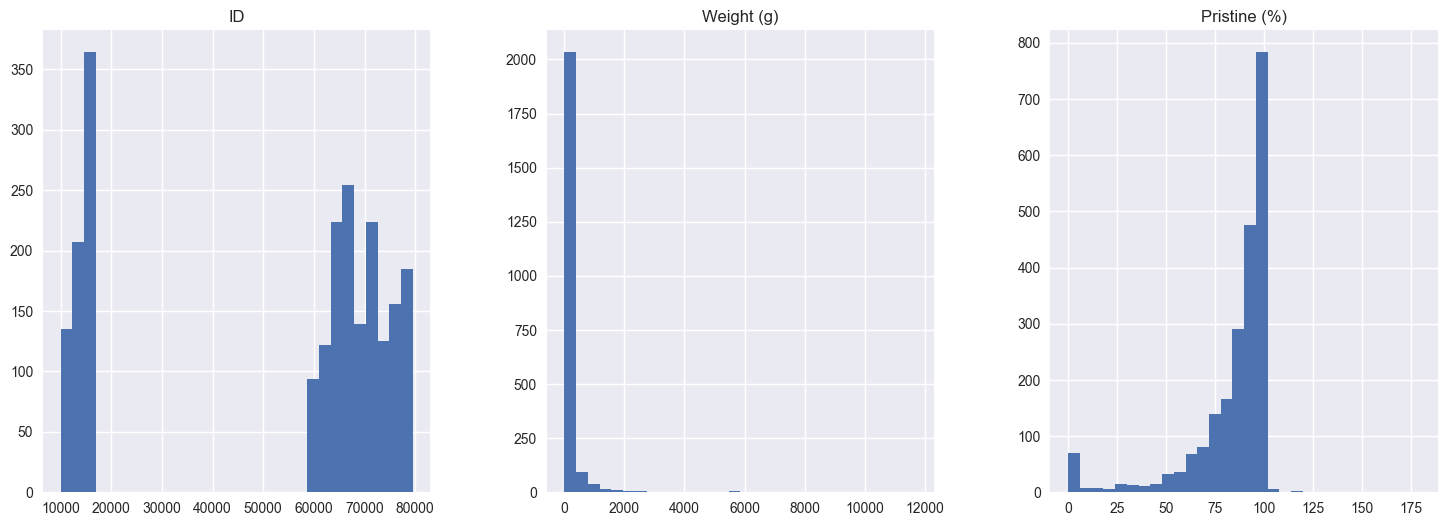

In [262]:
samples_df.hist(layout=(1, 3), figsize=(18, 6), bins=30)
plt.show()

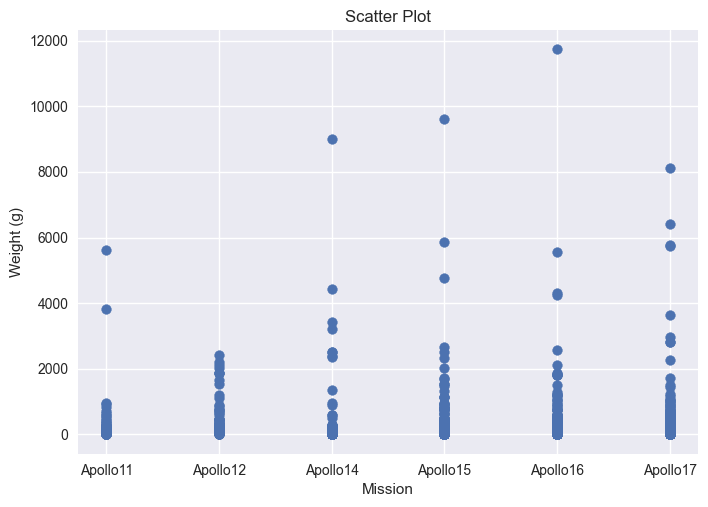

In [263]:
plt.scatter(samples_df['Mission'], samples_df['Weight (g)'])

plt.title('Scatter Plot')
plt.xlabel('Mission')
plt.ylabel('Weight (g)')
plt.show()

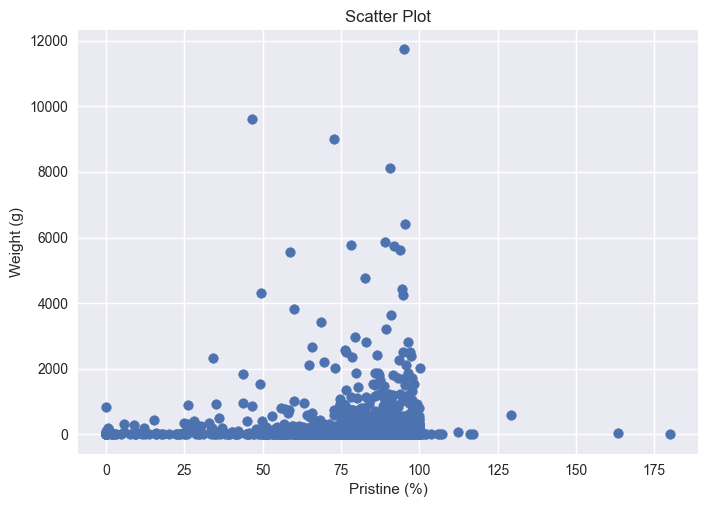

In [264]:
plt.scatter(samples_df['Pristine (%)'], samples_df['Weight (g)'])

plt.title('Scatter Plot')
plt.xlabel('Pristine (%)')
plt.ylabel('Weight (g)')
plt.show()

#### <a id='toc1_2_1_3_'></a>[Dealing with Missing value and Duplicate rows](#toc0_)

Creating a Backup from the Original DataSet and putting it up into the `samples_df_modify` data frame and working with it:

In [265]:
samples_df_modify = samples_df.copy()

Count of _NA (Not Available)_ value in every columns:

In [266]:
print(samples_df_modify.isna().sum())

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64


Count of _NaN (Not a Number)_ value in every columns:

In [267]:
print(samples_df_modify.isnull().sum())

ID              0
Mission         0
Type            0
Subtype         3
Weight (g)      0
Pristine (%)    0
dtype: int64


Count of _Duplicale rows_:

_(**Duplicate rows:** A row whose columns are the same as another row)_

In [268]:
print(samples_df_modify.duplicated().sum())

0


In [269]:
print('Data shape Before Handling missing data:')
print(samples_df_modify.shape)

Data shape Before Handling missing data:
(2229, 6)


Two approaches to handling missing data can be considered [(source)](https://blog.faradars.org/missing-data-in-r/):
- Removing observations or variables with missing values from statistical calculations and analyses.
- Replacing missing data with an alternative value (for example, the mean or median of variable values).

Replace _Weight (g)_ empty cells with _Weight (g) Mean_:

In [270]:
weight_mean = samples_df_modify['Weight (g)'].mean()
samples_df_modify['Weight (g)'].fillna(weight_mean, inplace=True)

  Remove missing values (Remove Rows) by `dropna()` function and putting up into `samples_df_modify` dataframe.
  
  Or use `samples_df_modify.dropna(inplace=True)` which does the same thing.

In [271]:
samples_df_modify.dropna(inplace=True)
print(samples_df_modify.shape)

(2226, 6)


Remove Duplicate rows with `drop_duplicates()` that it Return DataFrame with duplicate rows removed (if exist).

In [272]:
samples_df_modify.drop_duplicates(inplace=True)
print(samples_df_modify.shape)

(2226, 6)


In [273]:
print('After Handling missing data:')
print(samples_df_modify.shape)

After Handling missing data:
(2226, 6)


Conversion of weight unit from _gram_ to _kilogram_ for further analysis:

(Formula: 
$\text{kg} = \text{g} \times \frac{1}{1000}$)

In [274]:
samples_df_modify['Weight (g)'] = samples_df_modify['Weight (g)'].apply(
    lambda x: x * 0.001)


Rename _Weight (g)_ column title to _Weight (kg):_

In [275]:
samples_df_modify.rename(columns={'Weight (g)': 'Weight (kg)'}, inplace=True)
samples_df_modify.head()

,ID,Mission,Type,Subtype,Weight (kg),Pristine (%)
0,10001,Apollo11,Soil,Unsieved,0.1258,88.36
1,10002,Apollo11,Soil,Unsieved,5.6290,93.73
2,10003,Apollo11,Basalt,Ilmenite,0.2130,65.56
3,10004,Apollo11,Core,Unsieved,0.0448,71.76
4,10005,Apollo11,Core,Unsieved,0.0534,40.31


### <a id='toc1_2_2_'></a>[Outlier Detection](#toc0_)

Outliers:
- Caused by incorrect data entry.
- The real existence of outliers.

Remove outlire methods:
- [IQR _(with BoxPlot)_](https://en.wikipedia.org/wiki/Interquartile_range)
- [Skewnees](https://blog.faradars.org/skewness/)
- [Z-Score](https://chistio.ir/%D9%85%D8%AD%D8%A7%D8%B3%D8%A8%D9%87-%D8%AF%D8%A7%D8%AF%D9%87-%D9%BE%D8%B1%D8%AA-z-score/)
- ...

For read more:
- [Cleaning up Data from Outliers _(Pluralsight.com)_](https://www.pluralsight.com/guides/cleaning-up-data-from-outliers)
- [Ways to Detect and Remove the Outliers _(Towardsdatascience.com)_](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)


Outlier Detection with _BoxPlot:_

![Box polot](img/boxplot.jpg)

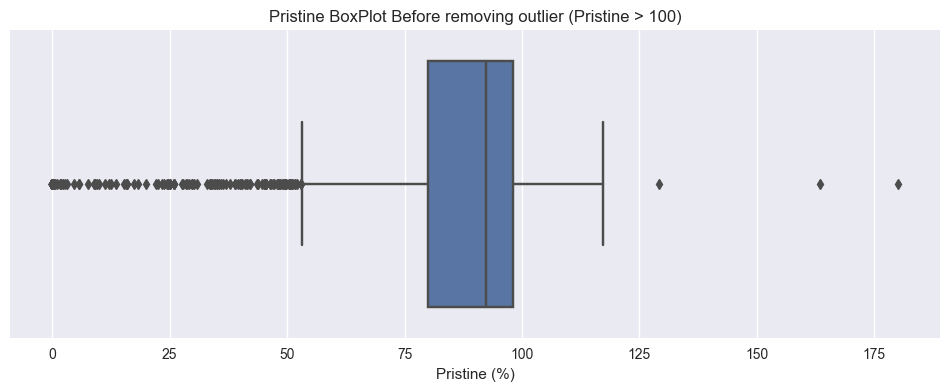

In [276]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=samples_df_modify['Pristine (%)'])

plt.title('Pristine BoxPlot Before removing outlier (Pristine > 100)')
plt.show()

Remove Outliers (rows) with IQR _(InterQuartile Range)_ method [(Read more)](https://en.wikipedia.org/wiki/Interquartile_range):

$
\text{IQR} = Q_3 - Q_1 \\
\text{Minimum} = Q_1 - 1.5 \times \text{IQR} \\
\text{Maximum} = Q_3 + 1.5 \times \text{IQR}
$

For remove Outlier of Weight (If needed), with IQR method, use below Code:

```{python}
q1_weight = samples_df_modify['Weight (kg)'].quantile(q=0.25)
q3_weight = samples_df_modify['Weight (kg)'].quantile(q=0.75)

IQR_weight = q3_weight - q1_weight

minimum = q1_weight - 1.5*IQR_weight
maximum = q3_weight + 1.5*IQR_weight


for row in samples_df_modify.index:
    if samples_df_modify.loc[row, 'Weight (kg)'] < (minimum):
        samples_df_modify.drop(row, inplace=True)
    
    if samples_df_modify.loc[row, 'Weight (kg)'] > (maximum):
        samples_df_modify.drop(row, inplace=True)

```

Remove Outlier of Pristine% if _Pristine > 100_:

In [277]:
print('Length of (Pristines > 100):' ,len(samples_df_modify['Pristine (%)'][samples_df_modify['Pristine (%)'] > 100]))
print('Maximum Pristine:' ,samples_df_modify['Pristine (%)'].max())

print('\nPristines > 100:\n')
print(samples_df_modify['Pristine (%)'][samples_df_modify['Pristine (%)'] > 100])

Length of (Pristines > 100): 18
Maximum Pristine: 180.0

Pristines > 100:

50      112.50
82      100.08
91      163.41
123     107.11
279     100.58
294     129.14
365     106.11
424     180.00
438     100.24
465     106.50
581     100.73
697     116.25
698     117.22
699     100.43
847     102.10
1440    103.60
1529    101.73
1853    100.20
Name: Pristine (%), dtype: float64


Removing:

In [278]:
for row in samples_df_modify.index:
    if samples_df_modify.loc[row, 'Pristine (%)'] > 100:
        samples_df_modify.drop(row, inplace=True)

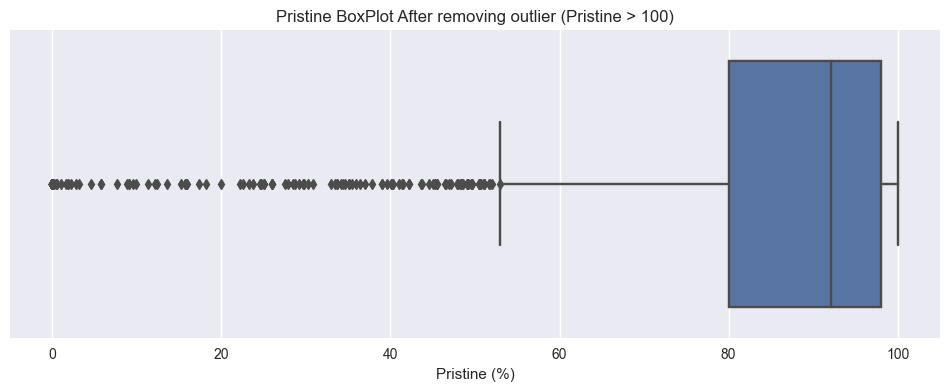

In [279]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=samples_df_modify['Pristine (%)'])

plt.title('Pristine BoxPlot After removing outlier (Pristine > 100)')
plt.show()

In [280]:
samples_df_modify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2228
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2208 non-null   int64  
 1   Mission       2208 non-null   object 
 2   Type          2208 non-null   object 
 3   Subtype       2208 non-null   object 
 4   Weight (kg)   2208 non-null   float64
 5   Pristine (%)  2208 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 185.3+ KB
